In [1]:
import pandas as pd
import numpy as np
import random
import tensorflow as tf
print(tf.__version__)
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import fashion_mnist

2.7.0


In [2]:
#이미지의 셋을 읽어오자

(train_images, train_labels), (test_images, test_label)=fashion_mnist.load_data()
train_images.shape, train_labels.shape

((60000, 28, 28), (60000,))

In [3]:
train_images[0].shape  # ===> (28, 28) 
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [4]:
test_images[0], test_label[0]

(array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0

In [5]:
#이미지 전처리 
#1. 4차원을 만들어주세요
# 1) 이미지 셋 자체는 3차원: 이미지 2차원+여러장
# 2) 이미지 픽셀미디어의 특징을 추출하는 처리를 하기위한 차원 하나더 추가
train_images=train_images.reshape((60000,28,28,1))
test_images=test_images.reshape((10000,28,28,1))




In [6]:
#2. 데이터를 읽어왔을때 픽셀마다의 값의 명암정도만 가지고 있음(-~255)
# 1) 표준화를 시켜줌
# 2) 방법 > 다 255로 나누어줌
# 3) 이미지는 크기가 매우 다양하므로 크기도 표준화시킨다. 

train_images, test_images=train_images.astype("float")/255.0,test_images.astype("float")/255.0


In [7]:
# 특성 추출 처리 
model=models.Sequential()
model.add(layers.Conv2D(32,(3,3), activation='relu', input_shape=(28,28,1)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64,(3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64,(3,3), activation='relu'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
Total params: 55,744
Trainable params: 55,744
Non-traina

In [8]:
#특성 추출한 결과를 학습데이터로 넣어서 학습할 예정 (Deep Modeling)
# 1. 특성 추출한 이미지 데이터를 1차원으로 만들어라 (Flatten)
# 2. 딥러닝 심층 신경망(Deep MLP )
# 3. fit()


model.add(layers.Flatten()) #입력층
model.add(layers.Dense(64,activation='relu'))#히든층
model.add(layers.Dense(64,activation='softmax'))#ㅜ출력층
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

In [9]:
#모델 평가
#1. test데이터를 검증하여 overfitting여부 확인!!!
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [10]:
history=model.fit(train_images,train_labels, epochs=3,batch_size=100)
history

Epoch 1/3
600/600 [==============================] - 14s 23ms/step - loss: 0.6879 - accuracy: 0.7541
Epoch 2/3
600/600 [==============================] - 16s 26ms/step - loss: 0.4052 - accuracy: 0.8531
Epoch 3/3
600/600 [==============================] - 19s 32ms/step - loss: 0.3451 - accuracy: 0.8728


In [11]:
loss,acc=model.evaluate(test_images, test_label, verbose=2)

313/313 - 1s - loss: 0.3521 - accuracy: 0.8738 - 1s/epoch - 5ms/step


예측

In [12]:
y_pred = model.predict(test_images)
y_pred[0]

array([1.3435223e-05, 1.8137766e-07, 1.0606755e-06, 5.8727534e-07,
       8.4353189e-08, 2.6230740e-03, 3.5845285e-06, 5.9571274e-02,
       3.8303531e-04, 9.3740356e-01, 3.8306576e-09, 1.6374849e-10,
       3.5694264e-10, 6.3925842e-09, 2.7593505e-09, 1.5338858e-10,
       2.1768337e-10, 1.4976048e-10, 1.7056598e-10, 6.5314788e-11,
       2.4623310e-11, 1.0783002e-09, 5.7382755e-11, 6.9717330e-09,
       1.6743491e-09, 4.3588128e-10, 6.7095498e-09, 4.6138979e-10,
       1.1199310e-10, 5.2795612e-09, 2.5921872e-11, 9.5076282e-12,
       5.8559747e-11, 1.9546051e-10, 4.7350417e-09, 2.7618821e-10,
       1.7650515e-09, 7.7436735e-10, 1.3965391e-10, 1.9852106e-11,
       3.7052855e-10, 1.2065845e-09, 1.5868566e-10, 3.3050732e-10,
       2.0453672e-10, 1.2347713e-09, 7.1051404e-10, 3.0806435e-10,
       2.2431095e-09, 1.2481504e-08, 2.1887585e-09, 1.0303366e-10,
       9.1964275e-12, 4.7107558e-09, 5.3531264e-09, 1.8350192e-10,
       4.3527373e-11, 1.3197505e-09, 1.1877240e-09, 3.7898057e

In [13]:
import numpy as np

In [14]:
y_pred0_index = np.argmax(y_pred[0]) 
y_pred0_index

9

In [15]:
y_pred_test = np.argmax(y_pred, axis= -1)
y_pred_test

array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

In [16]:
from sklearn.metrics import r2_score, confusion_matrix
R2 = r2_score(test_label, y_pred_test, multioutput='variance_weighted')
R2

0.7937454545454545

In [17]:
conf_matrix= confusion_matrix(test_label, y_pred_test)
conf_matrix

array([[832,   1,  30,  22,   3,   2,  92,   0,  18,   0],
       [  2, 964,   0,  25,   3,   0,   4,   0,   2,   0],
       [ 11,   0, 877,   9,  46,   0,  51,   0,   6,   0],
       [ 21,   1,  22, 896,  26,   0,  25,   0,   9,   0],
       [  1,   1, 122,  38, 706,   0, 123,   0,   9,   0],
       [  0,   0,   0,   2,   0, 955,   0,  29,   0,  14],
       [140,   1, 116,  23,  69,   0, 620,   0,  31,   0],
       [  0,   0,   0,   0,   0,   9,   0, 975,   0,  16],
       [  1,   1,   3,   3,   3,   2,   1,   6, 980,   0],
       [  0,   0,   0,   0,   0,   4,   0,  62,   1, 933]], dtype=int64)

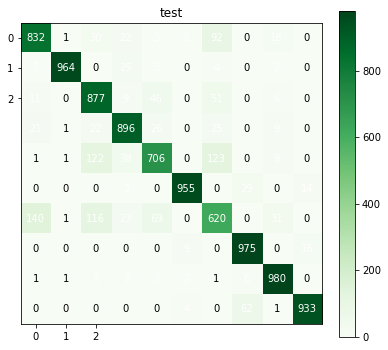

In [18]:
import matplotlib.pyplot as plt

title = 'test'
cmap=plt.cm.Greens
plt.figure(figsize=(6, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=cmap)  # , cmap=plt.cm.Greens
plt.title(title, size=12)
plt.colorbar(fraction=0.05, pad=0.05)
tick_marks = np.arange(3, 3)
plt.xticks(np.arange(3), ('0', '1', '2'))
plt.yticks(np.arange(3), ('0', '1', '2'))


fmt = 'd' 
thresh = 1
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, format(conf_matrix[i, j], fmt),
                 ha="center", va="center", color="white" if conf_matrix[i, j] > thresh else "black")  #horizontalalignment

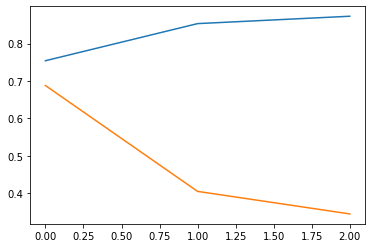

In [19]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.show()

In [20]:
test_images.shape

(10000, 28, 28, 1)

0: T-shirt/top
1: Trouser
2: Pullover
3: Dress
4: Coat
5: Sandal
6: Shirt
7: Sneaker
8: Bag
9: Ankle boot

In [32]:
labels_map = {0: 'T-Shirt', 1: 'Trouser', 2: 'Pullover', 3: 'Dress', 4: 'Coat',
              5: 'Sandal', 6: 'Shirt', 7: 'Sneaker', 8: 'Bag', 9: 'Ankle Boot'}

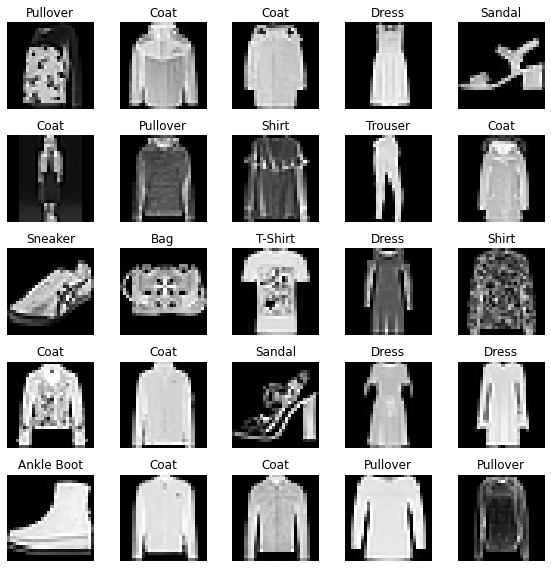

In [33]:

columns = 5
rows = 5
fig = plt.figure(figsize=(8, 8))

for i in range(1, columns * rows+1):
    data_idx = np.random.randint(len(test_images))
    img = test_images[data_idx].reshape([28, 28])
    label = labels_map[test_label[data_idx]]

    fig.add_subplot(rows, columns, i)
    plt.title(label)
    plt.imshow(img, cmap='gray')
    plt.axis('off')
plt.tight_layout()
plt.show()

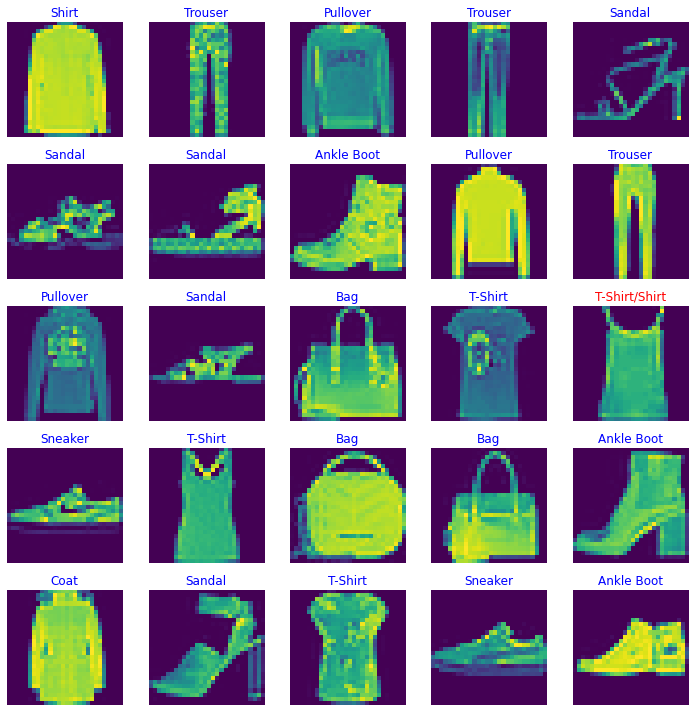

In [51]:
size = 25
batch_index = np.random.choice(len(test_images), size=size, replace=False)

img= test_images[batch_index]
label = test_label[batch_index]
y_pred_ =model.predict(img) #예측값

fig = plt.figure(figsize=(10, 10))
for i, (x, y, y_pred) in enumerate(zip(img, label, y_pred_)):
    p = fig.add_subplot(5, 5, i+1)
    if np.argmax(y_pred) == y:#예측값과 정답이 맞을때는 파란색으로 표시
        p.set_title("{}".format(labels_map[y]), color='blue')
    else: #틀렸을때 
        p.set_title("{}/{}".format(labels_map[np.argmax(y_pred)],
                               labels_map[y]), color='red')
    p.imshow(x.reshape(28, 28))
    p.axis('off')
plt.tight_layout()